**Tabla de contenido**

- [Pronóstico del uso de ancho de banda para centros de datos](#Pronostico-del-uso-de-ancho-de-banda-para-centros-de-datos)
- [Examinando el proceso de media movil autorregresivo](#Examinando-el-proceso-de-media-movil-autorregresivo)
- [Identificación de un proceso ARMA estacionario](#Identificacion-de-un-proceso-ARMA-estacionario)
- [Elaboración de un procedimiento de modelado general](#Elaboracion-de-un-procedimiento-de-modelado-general)
- [Comprendiendo el criterio de información de Akaike (AIC)](#Comprendiendo-el-criterio-de-informacion-de-Akaike-(AIC))
- [Seleccionando un modelo usando el AIC](#Seleccionando-un-modelo-usando-el-AIC)
- [Entendiendo el análisis residual](#Entendiendo-el-analisis-residual)
    - [Análisis cualitativo Q-Qplot](#Analisis-cualitativo)
    - [Análisis cuantitativo Ljung-Box](#Analisis-cuantitativo-Ljung-Box)
- [Aplicando el procedimiento de modelado general](#Aplicando-el-procedimiento-de-modelado-general)
- [Pronosticando el uso de ancho de banda](#Pronosticando-el-uso-de-ancho-de-banda)
- [Próximos pasos](#Proximos-pasos)
- [Resumen](#Resumen)

En este capítulo, examinaremos el `proceso de media móvil autorregresiva`, ARMA(p,q), donde p denota el orden de la parte autorregresiva y q denota el orden de la parte de media móvil. Además, el uso de los gráficos ACF y PACF para determinar los órdenes q y p, respectivamente, se vuelve complicado, ya que ambos gráficos mostrarán un patrón de decaimiento lento o sinusoidal. Por lo tanto, definiremos un procedimiento de modelado general que nos permitirá modelar series temporales tan complejas. Este procedimiento implica la selección del modelo utilizando el criterio de información de Akaike (AIC), que determinará la combinación óptima de p y q para nuestra serie.

Entonces debemos evaluar la validez del modelo utilizando el análisis de residuos, estudiando el correlograma, el diagrama Q-Q y el diagrama de densidad de los residuos del modelo para evaluar si se asemejan estrechamente al ruido blanco. Si ese es el caso, podemos pasar a pronosticar nuestra serie temporal utilizando el modelo ARMA(p,q).

Este capítulo introducirá conocimientos fundamentales para la previsión de series temporales complejas. Todos los conceptos introducidos aquí se volverán a utilizar en capítulos posteriores cuando empecemos a modelar series temporales no estacionarias e incorporar estacionalidad y variables exógenas.

# Pronostico del uso de ancho de banda para centros de datos

Supongamos que se te encarga predecir el uso del ancho de banda para un gran centro de datos. El ancho de banda se define como la tasa máxima de datos que se puede transferir. Su unidad base es bits por segundo (bps).

Prever el uso del ancho de banda permite a los centros de datos gestionar mejor sus recursos informáticos. En el caso de que se espere un menor uso del ancho de banda, pueden apagar algunos de sus recursos informáticos. Esto, a su vez, reduce los gastos y permite el mantenimiento. Por otro lado, si se espera que el uso del ancho de banda aumente, pueden dedicar los recursos necesarios para satisfacer la demanda y garantizar baja latencia, manteniendo así satisfechos a sus clientes.

Para esta situación, hay 10,000 puntos de datos que representan el uso de ancho de banda por hora comenzando el 1 de enero de 2019. Aquí el ancho de banda se mide en megabits por segundo (Mbps).

Para predecir el uso del ancho de banda, necesitamos identificar el proceso subyacente en nuestra serie. Así, seguiremos los pasos que definimos en el capítulo 5. De esa manera, podemos verificar si tenemos un paseo aleatorio, un proceso de media móvil o un proceso autorregresivo. 

`El primer paso es recopilar los datos`, lo cual ya se ha hecho en este caso. Luego debemos determinar si nuestra serie es estacionaria o no. La presencia de una tendencia en el gráfico sugiere que nuestra serie no es estacionaria. Sin embargo, aplicaremos la prueba ADF para verificar la estacionariedad y aplicaremos una transformación en consecuencia.

`Luego trazaremos la función ACF` y descubriremos que hay coeficientes de autocorrelación significativos después del rezago 0, lo que significa que no es una caminata aleatoria. Sin embargo, observaremos que los coeficientes decayen lentamente. No se vuelven abruptamente no significativos después de cierto rezago, lo que significa que no es un proceso de media móvil pura.

`Luego pasaremos a trazar la función PACF`. Esta vez notaremos un patrón sinusoidal, lo que significa que los coeficientes no se vuelven abruptamente no significativos después de un cierto rezago. Esto nos llevará a la conclusión de que tampoco se trata de un proceso puramente autorregresivo.

Por lo tanto, debe ser una combinación de procesos autorregresivos y de media móvil, lo que resulta en un proceso de media móvil autorregresiva que se puede modelar con el modelo ARMA(p,q), donde p es el orden del proceso autorregresivo y q es el orden del proceso de media móvil. Es difícil utilizar los gráficos ACF y PACF para encontrar respectivamente p y q, por lo que ajustaremos muchos modelos ARMA(p,q) con diferentes combinaciones de valores para p y q. Luego seleccionaremos un modelo de acuerdo con el criterio de información de Akaike y evaluaremos su viabilidad analizando sus residuos.

`Idealmente, los residuos de un modelo tendrán características similares al ruido blanco`. Entonces podremos utilizar este modelo para hacer pronósticos. Para este ejemplo, pronosticaremos el uso de ancho de banda por hora durante las próximas dos horas.


# Examinando el proceso de media movil autorregresivo

El `proceso autorregresivo de media móvi`l` es una combinación del `proceso autorregresivo` y el `proceso de media móvil`. Establece que el valor presente es linealmente dependiente de sus propios valores anteriores y una constante, al igual que en un proceso autorregresivo, así como de la media de la serie, el término de error actual y los términos de error pasados, como en un proceso de media móvil.

El proceso de media móvil autorregresivo se denota como `ARMA(p,q)`, donde $p$ es `el orden de la porción autorregresiva` y $q$ es el orden de la porción de media móvil. Matemáticamente, el proceso ARMA(p,q) se expresa como una combinación lineal de una constante $C$, los valores pasados de la serie $y_{t–p}$, la media de la serie $µ$, los términos de error pasados $ϵ_{t–q}$ y el término de error actual $ϵ_t$, como se muestra en la siguiente ecuanción. $$y_t = C + ϕ_1y_{t–1} + ϕ_2y_{t–2} +⋅⋅⋅+ ϕ_py_{t–p} + ϵ_t + θ_1ϵ_{t–1} + θ_2ϵ_{t–2} +⋅⋅⋅+ θ_qϵ_{t–q}$$

Nuevamente, el orden p determina el número de valores pasados que afectan el valor presente. De manera similar, el orden q determina el número de términos de error pasados que afectan el valor presente. En otras palabras, los órdenes p y q dictan el número de parámetros para las porciones autorregresivas y de media móvil, respectivamente.

Así, `si tenemos un proceso ARMA(1,1)`, estamos combinando un `proceso autorregresivo de orden 1`, o AR(1), con un proceso de `media móvil de orden 1`, o MA(1). Recuerde que un proceso autorregresivo de primer orden es una combinación lineal de una constante $C$, el valor de la serie en el paso de tiempo anterior $ϕ_1y_{t–1}$, y ruido blanco $ϵ_t$, como se muestra en la siguiente ecuanción.$$AR(1) := y_t = C + ϕ_1y_{t–1} + ϵ_t$$
También recuerda que un proceso de media móvil de primer orden, o MA(1), es una combinación lineal de la media de la serie $μ$, el término de error actual $ϵ_t$ y el término de error en el tiempo anterior $θ_1ϵ_{t–1}, como se muestra en la siguiente ecuanción. $$MA(1) := y_t = μ + ϵ_t + θ_1ϵ_{t–1}$$

Podemos combinar los procesos AR(1) y MA(1) para obtener un proceso ARMA(1,1) como se muestra en la siguiente ecuación. 
$$ARMA(1,1) := y_t = C + ϕ_1y_{t–1} + ϵ_t + θ_1ϵ_{t–1}$$

En el caso donde p = 0, tenemos un proceso ARMA(0,q), que es equivalente a un proceso puro MA(q) como se vio en el capítulo 4. De manera similar, si q = 0, tenemos un proceso ARMA(p,0), que es equivalente a un proceso puro AR(p), como se vio en el capítulo 5.

Ahora podemos ver cómo el orden p solo afecta la porción autorregresiva del proceso al determinar el número de valores pasados que se incluyen en la ecuación. De manera similar, el orden q solo afecta la porción de media móvil del proceso al determinar el número de términos de error pasados que se incluyen en la ecuación de ARMA(p,q). Por supuesto, cuanto más altos sean los órdenes p y q, más términos se incluirán, y más complejo se vuelve nuestro proceso.

Para modelar y pronosticar un proceso ARMA(p,q), necesitamos encontrar los órdenes p y q. De esa manera, podemos utilizar un modelo ARMA(p,q) para ajustar los datos disponibles y producir pronósticos.

# Identificacion de un proceso ARMA estacionario

Ahora que hemos definido el proceso autorregresivo de media móvil y hemos visto cómo los órdenes p y q afectan la ecuación del modelo, necesitamos determinar cómo identificar un proceso subyacente así en una serie temporal dada.

`Si tu proceso es estacionario y tanto los gráficos de ACF como de PACF muestran un patrón decreciente o sinusoidal, entonces es un proceso ARMA(p,q) estacionario.`

Sabemos que determinar el orden de nuestro proceso es clave en la modelización y la previsión, ya que el orden dictará cuántos parámetros deben incluirse en nuestro modelo. `Dado que los gráficos de ACF y PACF no son útiles en el caso de un proceso ARMA(p,q)`, debemos, por lo tanto, idear un procedimiento de modelización general que nos permita encontrar la combinación adecuada de (p,q) para nuestro modelo.

# Elaboracion de un procedimiento de modelado general

`Procedimiento general de modelado para un proceso ARMA(p, q)`. Los primeros pasos son recopilar los datos, probar la estacionariedad y aplicar transformaciones en consecuencia. Luego definimos una lista de posibles valores para p y q. A continuación, ajustamos cada combinación de ARMA(p, q) a nuestros datos y seleccionamos el modelo con el AIC más bajo. Luego realizamos el análisis de residuos observando el gráfico Q-Q y el correlograma de residuos. Si se acercan al de ruido blanco, el modelo se puede utilizar para pronósticos. De lo contrario, debemos probar diferentes valores para p y q.

Los primeros pasos siguen siendo los mismos que hemos ido construyendo gradualmente hasta el capítulo 5, ya que todavía debemos recopilar los datos, probar la estacionaridad y aplicar transformaciones de acuerdo con ello. Luego enumeramos diferentes valores posibles de p y q; tenga en cuenta que solo toman enteros positivos. Con una lista de valores posibles, podemos ajustar cada combinación única de ARMA(p,q) a nuestros datos.

Una vez hecho esto, podemos calcular el criterio de información de Akaike (AIC). Esto cuantifica la calidad de cada modelo en relación entre sí. El modelo con el AIC más bajo es entonces seleccionado.

A partir de ahí, podemos analizar los residuos del modelo, que son la diferencia entre los valores reales y los valores predichos del modelo. Idealmente, los residuos deberían parecer ruido blanco, lo que significaría que cualquier diferencia entre los valores predichos y los valores reales se debe a la aleatoriedad. Por lo tanto, los residuos deben ser no correlacionados y distribuidos independientemente.

Podemos evaluar esas propiedades estudiando el gráfico cuantil-cuantil (gráfico Q-Q) y realizando la prueba de Ljung-Box. Si el análisis nos lleva a concluir que los residuales son completamente aleatorios, tenemos un modelo listo para pronosticar. De lo contrario, debemos probar un conjunto diferente de valores para p y q y comenzar el proceso nuevamente.

# Comprendiendo el criterio de informacion de Akaike (AIC)

Antes de cubrir los pasos descritos anteriormente, `necesitamos determinar cómo elegiremos el mejor modelo de todos los modelos que ajustaremos`. Aquí utilizaremos el `criterio de información de Akaike (AIC)` para seleccionar el modelo óptimo.

`El AIC estima la calidad de un modelo en relación con otros modelos`. Dado que habrá algo de información perdida cuando un modelo se ajusta a los datos, `el AIC cuantifica la cantidad relativa de información perdida por el modelo`. Cuanta menos información se pierda, menor será el valor del AIC y mejor será el modelo.

El AIC es una función del número de parámetros estimados k y el valor máximo de la función de verosimilitud para el modelo L̂ , como se muestra en la siguiente ecuación $$AIC 2k – 2ln(L̂ )$$

El número de parámetros estimados k está directamente relacionado con el orden (p,q) de un modelo ARMA(p,q). Si ajustamos un modelo ARMA(2,2), entonces tenemos 2 + 2 = 4 parámetros para estimar. Si ajustamos un modelo ARMA(3,4), entonces tenemos 3 + 4 = 7 parámetros para estimar. Puedes ver cómo ajustar un modelo más complejo puede penalizar la puntuación AIC: a medida que el orden (p,q) aumenta, el número de parámetros k aumenta, y por lo tanto, el AIC aumenta.

`La función de verosimilitud mide la calidad del ajuste de un modelo`. Se puede ver como lo opuesto de la función de distribución. Dado un modelo con parámetros fijos, la función de distribución medirá la probabilidad de observar un punto de datos. `La función de verosimilitud invierte la lógica. Dada un conjunto de datos observados, estimará cuán probable es que diferentes parámetros del modelo generen los datos observados.`

Por ejemplo, consideremos la situación en la que lanzamos un dado de seis caras. La función de distribución nos dice que hay una probabilidad de 1/6 de que observemos uno de estos valores: [1,2,3,4,5,6]. Ahora cambiemos esta lógica para explicar la función de verosimilitud. Supongamos que lanzas un dado 10 veces y obtienes los siguientes valores: [1,5,3,4,6,2,4,3,2,1]. La función de verosimilitud determinará cuán probable es que el dado tenga seis caras. Aplicando esta lógica al contexto de AIC, podemos pensar en la función de verosimilitud como una respuesta a la pregunta "`¿Qué tan probable es que mis datos observados provengan de un modelo ARMA(1,1)`?" Si es muy probable, lo que significa que L̂ es grande, entonces el modelo ARMA(1,1) se ajusta bien a los datos.

Por lo tanto, si un modelo se ajusta muy bien a los datos, el valor máximo de la verosimilitud será alto. Dado que el AIC resta el logaritmo natural del valor máximo de la verosimilitud, representado por L̂ en la anterior ecuación, entonces un valor grande de L̂ disminuirá el AIC.

subajuste y el sobreajuste. Recuerda que cuanto más bajo sea el AIC, mejor será el modelo en comparación con otros modelos. Por lo tanto, un modelo sobreajustado tendría un ajuste muy bueno, lo que significa que L̂ es grande y el AIC disminuye. Sin embargo, el número de parámetros k también sería grande, lo que penaliza el AIC. Un modelo subajustado tendría un pequeño número de parámetros, por lo que k sería pequeño. Sin embargo, el valor máximo de la función de verosimilitud también sería pequeño debido al mal ajuste, lo que significa nuevamente que el AIC se penaliza. Así, `el AIC nos permite encontrar un equilibrio entre el número de parámetros en un modelo y un buen ajuste a los datos de entrenamiento.`

Finalmente, `debemos tener en cuenta que el AIC cuantifica la calidad de un modelo en relación a otros modelos solamente. Por lo tanto, es una medida relativa de calidad`. En el caso de que ajustemos solo modelos pobres a nuestros datos, el AIC simplemente nos ayudará a determinar el mejor de ese grupo de modelos.


# Seleccionando un modelo usando el AIC

Definiremos una función `optimize_ARMA` que toma como entrada los datos y la lista de combinaciones únicas (p,q). Dentro de la función, inicializaremos una lista vacía para almacenar cada combinación (p,q) y su correspondiente AIC. Luego, iteraremos sobre cada combinación (p,q) y ajustaremos un modelo ARMA(p,q) a nuestros datos. Calcularemos el AIC y almacenaremos el resultado. Después, crearemos un DataFrame y lo ordenaremos por el valor de AIC en orden ascendente, ya que cuanto menor sea el AIC, mejor será el modelo. Nuestra función finalmente saldrá el DataFrame ordenado para que podamos seleccionar el modelo adecuado. La función optimize_ARMA se muestra en la siguiente lista.

1. La función toma como entradas los datos de series temporales y la lista de combinaciones únicas (p,q).
2. Inicializa una lista vacía para almacenar el orden (p,q) y su correspondiente AIC como una tupla.
3. Iterar sobre cada combinación única (p,q). El uso de tqdm_notebook mostrará una barra de progreso.
4. Ajusta un modelo ARMA(p,q) utilizando la función SARIMAX. Especificamos `simple_differencing=False` para evitar la diferenciación. Recuerda que la diferenciación es el resultado de $y_t– y_{t–1}$. También especificamos `disp=False` para evitar imprimir mensajes de convergencia en la consola.
5. Calculate the model’s AIC.
6. Agrega la combinación (p,q) y el AIC como una tupla a la lista de resultados.
7. Almacena la combinación (p,q) y AIC en un DataFrame.
8. Etiquete las columnas del DataFrame.
9. Ordena el DataFrame en orden ascendente de valores AIC. Cuanto más bajo sea el AIC, mejor será el modelo


In [ ]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame: #1
    results = [] #2
    for order in tqdm_notebook(order_list): #3
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False) #4
        except:
            continue
        aic = model.aic #5
        results.append([order, aic]) #6
    result_df = pd.DataFrame(results) #7
    result_df.columns = ['(p,q)', 'AIC'] #8
    result_df = result_df.sort_values(by='AIC',ascending=True).reset_index(drop=True) #9
    return result_df

Con nuestra función definida, ahora podemos usarla y ajustar los diferentes modelos ARMA(p,q). Como se mencionó en la sección anterior, el AIC es una medida de calidad relativa. Ahora necesitamos una medida absoluta de la calidad del modelo. Esto nos lleva al siguiente paso de nuestro procedimiento de modelado, que es el análisis de residuos.

# Entendiendo el analisis residual

`¿muestra el gráfico Q-Q una línea recta y son los residuos no correlacionados?` Si la respuesta a ambas preguntas es sí, entonces tenemos un modelo que está listo para hacer pronósticos. 

Los residuales de un modelo son simplemente la diferencia entre los valores predichos y los valores reales. En una situación perfecta los residuos de un modelo son ruido blanco. Esto indica que el modelo ha capturado toda la información predictiva y solo queda una fluctuación aleatoria que no se puede modelar. Por lo tanto, los residuos deben ser no correlacionados y tener una distribución normal para que podamos concluir que tenemos un buen modelo para hacer pronósticos.

`Hay dos aspectos en el análisis de residuos:` un análisis cualitativo y un análisis cuantitativo. El análisis cualitativo se centra en estudiar el gráfico Q-Q, mientras que el análisis cuantitativo determina si nuestros residuos son no correlacionados.

## Analisis cualitativo

El primer paso en el análisis de residuos es el estudio del gráfico cuantiles-cuantiles (gráfico Q-Q). El gráfico Q-Q es una herramienta gráfica para verificar nuestra hipótesis de que los residuos del modelo están distribuidos normalmente.

El gráfico Q-Q se construye al trazar los cuantiles de nuestros residuos en el eje y contra los cuantiles de una distribución teórica, en este caso la distribución normal, en el eje x. Esto resulta en un diagrama de dispersión. Estamos comparando la distribución con una distribución normal porque queremos que los residuos sean similares al ruido blanco, que es normalmente distribuido.

Si ambas distribuciones son similares, lo que significa que la distribución de los residuos está cerca de una distribución normal, el gráfico Q-Q mostrará una línea recta que se aproxima a y = x. Esto, a su vez, significa que nuestro modelo se ajusta bien a nuestros datos.
![Q-Qplotbueno](fig/qqplotbueno.png)

Por otro lado, un gráfico Q-Q de residuos que no están cerca de una distribución normal generará una curva que se aparta de y = x. Si obtenemos este tipo de resultado, podemos concluir que la distribución de nuestros residuos no se asemeja a una distribución normal, lo cual es un signo de que nuestro modelo no se ajusta bien a nuestros datos. 
![Q-Qplotmalo](fig/qqplotmalo.png)
Por lo tanto, debemos intentar un rango diferente de valores para p y q, ajustar los modelos, seleccionar el que tenga el AIC más bajo y realizar un análisis de residuos en el nuevo modelo.

Puedes ver cómo el gráfico Q-Q puede ayudarnos. Sabemos que si un modelo se ajusta bien a nuestros datos, los residuos serán similares al ruido blanco y, por lo tanto, tendrán propiedades similares. Esto significa que deberían seguir una distribución normal. Por lo tanto, si el gráfico Q-Q muestra una línea recta, tenemos un buen modelo. De lo contrario, nuestro modelo debe ser descartado y debemos intentar ajustar un mejor modelo.

Aunque el gráfico Q-Q es un método rápido para evaluar la calidad de nuestro modelo, este análisis sigue siendo subjetivo. Por lo tanto, apoyaremos aún más nuestro análisis de residuos con un método cuantitativo aplicando la prueba de Ljung-Box.



## Analisis cuantitativo Ljung-Box

Una vez que hemos analizado el gráfico Q-Q y determinado que nuestros residuales están aproximadamente distribuidos normalmente, podemos aplicar la prueba de Ljung-Box para demostrar que los residuales son no correlacionados. Recuerda que un buen modelo tiene residuales que son similares al ruido blanco, por lo que los residuales deben estar distribuidos normalmente y ser no correlacionados.

`La prueba de Ljung-Box es una prueba estadística que verifica si la autocorrelación de un grupo de datos es significativamente diferente de 0`. En nuestro caso, aplicaremos la prueba de Ljung-Box a los residuos del modelo para evaluar si están correlacionados o no. `La hipótesis nula establece que los datos están distribuidos de manera independiente, lo que significa que no hay autocorrelación`.

La prueba devolverá la estadística de Ljung-Box y un valor p. `Si el valor p es menor que 0.05, rechazamos la hipótesis nula, lo que significa que los residuos no están distribuidos de manera independiente, lo que a su vez significa que hay autocorrelación`. En tal situación, los residuos no se aproximan a las propiedades del ruido blanco, y el modelo debe ser descartado.

`Si el valor p es mayor que 0.05, no podemos rechazar la hipótesis nula, lo que significa que nuestros residuos están distribuidos de manera independiente`. Por lo tanto, no hay autocorrelación y los residuos son similares al ruido blanco. Esto significa que podemos continuar con nuestro modelo y hacer pronósticos.

# Aplicando el procedimiento de modelado general

![p_modelado-general](fig/pmodeladogenerla.png)

Ahora podemos aplicar este procedimiento en el conjunto de datos de ancho de banda para obtener el mejor modelo posible para esta situación. Recuerda que `nuestro objetivo es pronosticar el uso del ancho de banda para las próximas 2 horas`.

1. `El primer paso es recopilar y cargar los datos usando pandas:`

In [3]:
import pandas as pd
import os

path_file = lambda file: os.path.join(os.getcwd(),'data',file)
df = pd.read_csv(path_file('bandwidth.csv'))

Podemos entonces graficar nuestra serie de tiempo y buscar una tendencia o un patrón estacional.

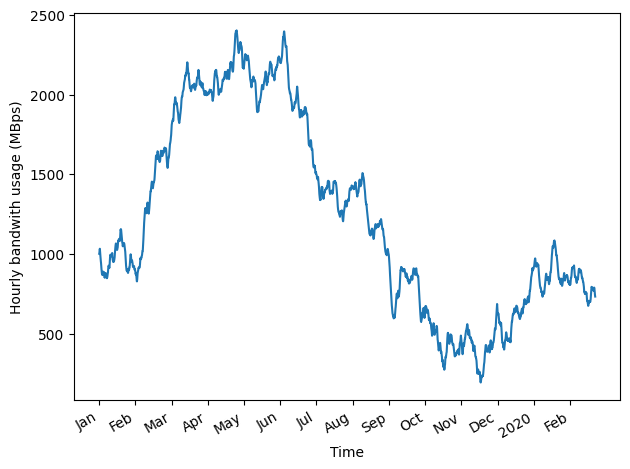

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.plot(df.hourly_bandwidth)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage (MBps)')
plt.xticks(
np.arange(0, 10000, 730),
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec', '2020', 'Feb'])
fig.autofmt_xdate()
plt.tight_layout()

Con los datos representados en la figura, puedes ver que no hay un patrón periódico en los datos. Sin embargo, notarás la presencia de una tendencia a largo plazo, lo que significa que nuestros datos probablemente no son estacionarios. Apliquemos la prueba ADF para verificar nuestra hipótesis. Nuevamente, utilizaremos la función adfuller de statsmodels y mostraremos la estadística ADF y el valor p.

In [5]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df['hourly_bandwidth'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.8714653199452735
p-value: 0.7972240255014551


Esto imprime una estadística ADF de -0.8 y un valor p de 0.80. Por lo tanto, no podemos rechazar la hipótesis nula, lo que significa que nuestra serie temporal no es estacionaria. Debemos aplicar una transformación a nuestros datos para hacerla estacionaria. Apliquemos una diferenciación de primer orden utilizando numpy.

In [6]:
import numpy as np
bandwidth_diff = np.diff(df.hourly_bandwidth, n=1)

Con esto hecho, podemos aplicar nuevamente la prueba ADF, esta vez sobre los datos diferenciados, para probar la estacionariedad.

In [7]:
ADF_result = adfuller(bandwidth_diff)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -20.694853863789017
p-value: 0.0


Esto devuelve una estadística ADF de -20.69 y un valor p de 0.0. Con una estadística ADF grande y negativa y un valor p que es mucho menor que 0.05, podemos decir que nuestra serie diferenciada es estacionaria.

Ahora estamos listos para comenzar a modelar nuestro proceso estacionario utilizando un modelo ARMA(p,q). Dividiremos nuestra serie en conjuntos de entrenamiento y prueba. Aquí mantendremos los últimos 7 días de datos para el conjunto de prueba. Dado que nuestras previsiones son para las próximas 2 horas, el conjunto de prueba contiene 84 períodos de 2 horas sobre los cuales evaluar el rendimiento de nuestros modelos, ya que 7 días de datos horarios suman 168 horas.


In [8]:
df_diff = pd.DataFrame({'bandwidth_diff': bandwidth_diff})
train = df_diff[:-168]
test = df_diff[-168:]
print(len(train))
print(len(test))

9831
168


Podemos imprimir la longitud de los conjuntos de entrenamiento y prueba como una verificación de sensatez, y efectivamente, el conjunto de prueba tiene 168 puntos de datos, y el conjunto de entrenamiento tiene 9,831 puntos de datos.

Ahora vamos a visualizar nuestro conjunto de entrenamiento y nuestro conjunto de prueba tanto para la serie diferenciada como para la serie original. 

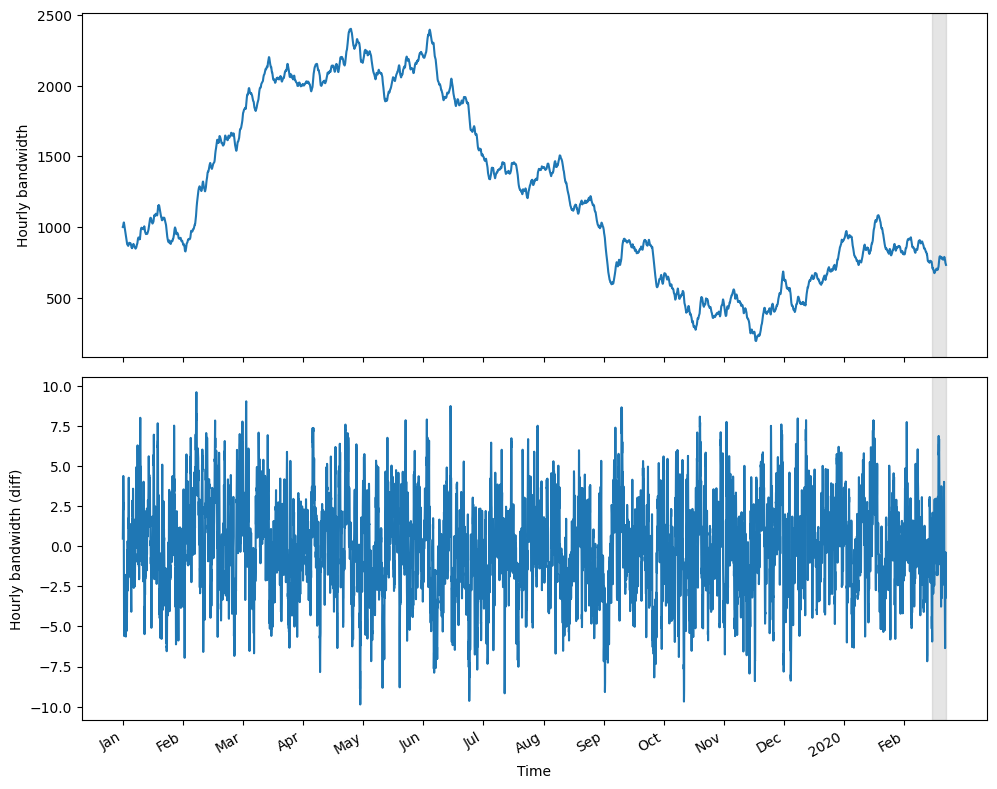

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,8))
ax1.plot(df.hourly_bandwidth)
ax1.set_xlabel('Time')
ax1.set_ylabel('Hourly bandwidth')
ax1.axvspan(9831, 10000, color='#808080', alpha=0.2)
ax2.plot(df_diff.bandwidth_diff)
ax2.set_xlabel('Time')
ax2.set_ylabel('Hourly bandwidth (diff)')
ax2.axvspan(9830, 9999, color='#808080', alpha=0.2)
plt.xticks(
np.arange(0, 10000, 730),
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec', '2020', 'Feb'])
fig.autofmt_xdate()
plt.tight_layout()

Con nuestro conjunto de datos listo, ahora podemos ajustar diferentes modelos ARMA(p,q) utilizando la función optimize_ ARMA. Recuerda que la función toma los datos y la lista de combinaciones únicas de (p,q) como entrada. Dentro de la función, inicializamos una lista vacía para almacenar cada combinación (p,q) y su correspondiente AIC.

1. La función toma como entradas los datos de series temporales y la lista de combinaciones únicas (p,q).
2. Inicializa una lista vacía para almacenar el orden (p,q) y su correspondiente AIC como una tupla.
3. Iterar sobre cada combinación única (p,q). El uso de tqdm_notebook mostrará una barra de progreso.
4. Ajusta un modelo ARMA(p,q) utilizando la función SARIMAX. Especificamos `simple_differencing=False` para evitar la diferenciación. Recuerda que la diferenciación es el resultado de $y_t– y_{t–1}$. También especificamos `disp=False` para evitar imprimir mensajes de convergencia en la consola.
5. Calculate the model’s AIC.
6. Agrega la combinación (p,q) y el AIC como una tupla a la lista de resultados.
7. Almacena la combinación (p,q) y AIC en un DataFrame.
8. Etiquete las columnas del DataFrame.
9. Ordena el DataFrame en orden ascendente de valores AIC. Cuanto más bajo sea el AIC, mejor será el modelo

In [10]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame: #1
    results = [] #2
    for order in tqdm_notebook(order_list): #3
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False) #4
        except:
            continue
        aic = model.aic #5
        results.append([order, aic]) #6
    result_df = pd.DataFrame(results) #7
    result_df.columns = ['(p,q)', 'AIC'] #8
    result_df = result_df.sort_values(by='AIC',ascending=True).reset_index(drop=True) #9
    return result_df

`Aquí intentaremos valores para p y q que van de 0 a 3 inclusivamente`. Esto significa que ajustaremos 16 modelos ARMA(p,q) únicos a nuestro conjunto de entrenamiento y seleccionaremos el que tenga el AIC más bajo. Siéntete libre de cambiar el rango de valores para p y q, pero ten en cuenta que un rango más amplio resultará en más modelos ajustados y un tiempo de cálculo más largo. Además, no necesitas preocuparte por el sobreajuste; estamos seleccionando nuestro modelo usando el AIC, lo que nos evitará seleccionar un modelo que sobreajuste.

In [ ]:
from itertools import product
ps = range(0, 4, 1) # El orden p puede tener los valores {0,1,2,3}.
qs = range(0, 4, 1) # El orden q puede tener los valores {0,1,2,3}.
order_list = list(product(ps, qs)) # Genera las combinaciones únicas (p,q).

Con este paso completado, podemos pasar nuestro conjunto de entrenamiento y la lista de combinaciones únicas (p,q) a la función optimize_ARMA.

In [12]:
result_df = optimize_ARMA(train['bandwidth_diff'], order_list)
result_df

/tmp/ipykernel_21599/3461375138.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list): #3


  0%|          | 0/16 [00:00<?, ?it/s]

/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,"(p,q)",AIC
0,"(3, 2)",27991.063879
1,"(2, 3)",27991.287509
2,"(2, 2)",27991.603598
3,"(3, 3)",27993.416924
4,"(1, 3)",28003.349550
5,"(1, 2)",28051.351401
6,"(3, 1)",28071.155496
7,"(3, 0)",28095.618186
8,"(2, 1)",28097.250766
9,"(2, 0)",28098.407664


`Notarás que los primeros tres modelos tienen todos un AIC de 27,991, con solo ligeras diferencias. Por lo tanto, argumentaría que el modelo ARMA(2,2) es el modelo que se debe seleccionar`. Su valor de AIC está muy cerca del ARMA(3,2) y ARMA(2,3), mientras que es menos complejo, ya que tiene cuatro parámetros a estimar en lugar de cinco. Por lo tanto, seleccionaremos el modelo ARMA(2,2) y pasaremos a los siguientes pasos, que son el análisis de los residuos del modelo.

`Para realizar el análisis residual, ajustaremos el modelo ARMA(2,2) a nuestro conjunto de entrenamiento. Luego utilizaremos el método plot_diagnostics para estudiar el gráfico Q-Q, así como los otros gráficos acompañantes.`

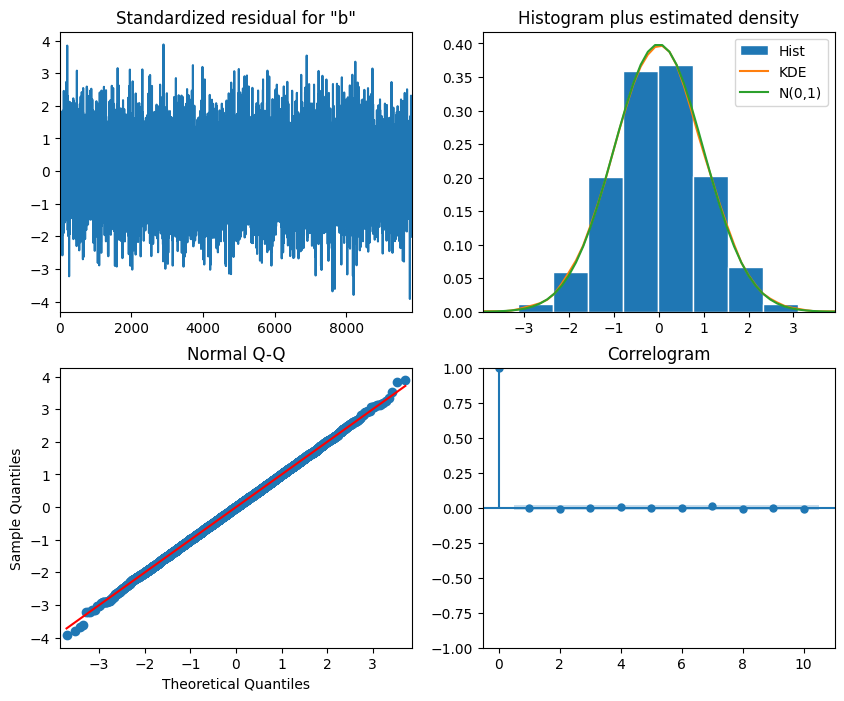

In [13]:
model = SARIMAX(train['bandwidth_diff'], order=(2,0,2),simple_differencing=False) 
# order=(p, d, q), d=0: la serie ya es estacionaria.

model_fit = model.fit(disp=False)
model_fit.plot_diagnostics(figsize=(10, 8));

En la figura se puede ver que el gráfico en la esquina superior izquierda no muestra ninguna tendencia y la media parece constante a lo largo del tiempo, lo que significa que nuestros residuos son probablemente estacionarios. La parte superior derecha muestra un gráfico de densidad con una forma similar a la de una distribución normal. El gráfico Q-Q en la esquina inferior izquierda muestra una línea recta gruesa que está muy cerca de y = x. Finalmente, el gráfico ACF en la esquina inferior derecha no muestra autocorrelación después del rezago 0. Por lo tanto, la figura  indica que nuestros residuos se parecen claramente al ruido blanco, ya que están distribuidos normalmente y son no correlacionados.

`Nuestro último paso es realizar la prueba de Ljung-Box en los residuos para los primeros 10 rezagos`. Si los valores p devueltos superan 0.05, no podemos rechazar la hipótesis nula, lo que significa que nuestros residuos son no correlacionados y distribuidos independientemente, al igual que el ruido blanco.

In [20]:
from statsmodels.stats.diagnostic import acorr_ljungbox
residuals = model_fit.resid

lb_test = acorr_ljungbox(residuals, lags=np.arange(1, 11))  # No importa el return_df
# Extraer solo los p-values como array
pvalue = lb_test["lb_pvalue"].values

print(pvalue)

[0.83725732 0.81124743 0.91441596 0.9315449  0.97367787 0.98101905
 0.95260714 0.91906661 0.95361504 0.96401518]


Los valores p devueltos superan todos 0.05. Por lo tanto, podemos concluir que nuestros residuos son efectivamente no correlacionados. Nuestro modelo ARMA(2,2) ha pasado todas las pruebas en el análisis de residuos, y estamos listos para utilizar este modelo para predecir el uso de ancho de banda.

# Pronosticando el uso de ancho de banda

En la sección anterior, aplicamos el procedimiento general de modelado en el conjunto de datos de ancho de banda y concluimos que un modelo ARMA(2,2) era el mejor modelo para nuestros datos. Ahora utilizaremos el modelo ARMA(2,2) para predecir las próximas 2 horas de uso de ancho de banda durante 7 días.

Reutilizaremos la función rolling_forecast que definimos y usamos en los capítulos 4 y 5, como se muestra en el listado 6.3. Recuerda que esta función nos permite pronosticar unos pocos pasos de tiempo a la vez, hasta que tengamos pronósticos para todo el horizonte. Esta vez, por supuesto, ajustaremos un modelo ARMA(2,2) a nuestros datos diferenciados. Además, compararemos el rendimiento del modelo con dos puntos de referencia: la media y el último valor conocido. Esto nos permitirá asegurarnos de que un modelo ARMA(2,2) rinde mejor que los métodos de pronóstico ingenuos.

In [21]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int,window: int, method: str) -> list:
    total_len = train_len + horizon
    end_idx = train_len
    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean
    
    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value
    
    elif method == 'ARMA':
        pred_ARMA = []
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(2,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)
        return pred_ARMA

Con rolling_forecast  definido, podemos usarlo para evaluar el rendimiento de los diferentes métodos de pronóstico. Primero crearemos un DataFrame para contener los valores reales del conjunto de prueba, así como las predicciones de los diferentes métodos. Luego especificaremos el tamaño de los conjuntos de entrenamiento y prueba. Vamos a predecir dos pasos a la vez, porque tenemos un modelo ARMA(2,2), lo que significa que hay un componente MA(2). Sabemos por el capítulo 4 que predecir más allá de q pasos en el futuro con un modelo MA(q) simplemente devolverá la media, por lo que las predicciones permanecerán planas.

`Por lo tanto, evitaremos esta situación configurando la ventana en 2`. Luego podemos realizar pronósticos en el conjunto de prueba utilizando el método de la media, el método del último valor conocido y el modelo ARMA(2,2), y almacenar cada pronóstico en su columna correspondiente en el conjunto de prueba.

In [23]:
pred_df = test.copy()
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2
pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW,'last')
pred_ARMA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')

test.loc[:, 'pred_mean'] = pred_mean
test.loc[:, 'pred_last_value'] = pred_last_value
test.loc[:, 'pred_ARMA'] = pred_ARMA
test.head()

,bandwidth_diff,pred_mean,pred_last_value,pred_ARMA
9831,-5.943995,-0.028214,-5.791207,-5.460661
9832,-5.865194,-0.028214,-5.791207,-4.890626
9833,-3.197066,-0.029410,-5.865194,-5.335905
9834,-1.090197,-0.029410,-5.865194,-4.751731
9835,0.665291,-0.029840,-1.090197,-0.375596


Luego podemos trazar y visualizar las previsiones para cada método.

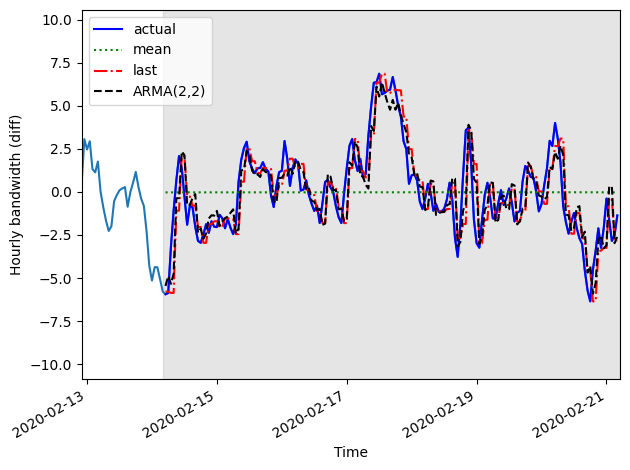

In [25]:
fig, ax = plt.subplots()
ax.plot(df_diff['bandwidth_diff'])
ax.plot(test['bandwidth_diff'], 'b-', label='actual')
ax.plot(test['pred_mean'], 'g:', label='mean')
ax.plot(test['pred_last_value'], 'r-.', label='last')
ax.plot(test['pred_ARMA'], 'k--', label='ARMA(2,2)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwidth (diff)')
ax.axvspan(9830, 9999, color='#808080', alpha=0.2)
ax.set_xlim(9800, 9999)
plt.xticks(
[9802, 9850, 9898, 9946, 9994],
['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])
fig.autofmt_xdate()
plt.tight_layout()

Figura. Pronósticos del uso de ancho de banda horario diferenciado utilizando la media, el último valor conocido y un modelo ARMA(2,2). Se puede observar cómo los pronósticos de ARMA(2,2) y los pronósticos del último valor conocido casi coinciden con los valores reales del conjunto de prueba.

Ahora mediremos el error cuadrático medio (MSE) para evaluar el rendimiento de cada modelo. El modelo con el MSE más bajo es el que mejor rendimiento tiene.


In [26]:
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(test['bandwidth_diff'], test['pred_mean'])
mse_last = mean_squared_error(test['bandwidth_diff'],test['pred_last_value'])
mse_ARMA = mean_squared_error(test['bandwidth_diff'], test['pred_ARMA'])
print(mse_mean, mse_last, mse_ARMA)

6.306526957989325 2.2297582947733656 1.7690462115487038


Esto devuelve un MSE de 6.3 para el método de media, 2.2 para el método del último valor conocido, y 1.8 para el modelo ARMA(2,2). El modelo ARMA(2,2) supera las referencias, lo que significa que tenemos un modelo de buen rendimiento.

El paso final es invertir la transformación de nuestra previsión para llevarla a la misma escala que nuestros datos originales. Recuerde que diferenciamos los datos originales para hacerlos estacionarios. Luego se aplicó el modelo ARMA(2,2) en el conjunto de datos estacionario y produjo previsiones que están diferenciadas.

Para invertir la transformación de diferenciación, podemos aplicar una suma acumulativa, tal como hicimos en los capítulos 4 y 5.

`df['hourly_bandwidth'].iloc[9832] + test['pred_ARMA'].cumsum()`
Esto está haciendo lo siguiente:

- Toma el valor de hourly_bandwidth en la posición 9832 como punto de partida.

- A eso le suma la suma acumulada de las predicciones ARMA (test['pred_ARMA'].cumsum()).

- Así, está reconstruyendo valores predichos acumulados a partir del último valor observado.

📈 Es decir: está simulando una serie predicha basada en valores acumulativos desde un punto inicial.

In [ ]:
df['pred_bandwidth'] = pd.Series()
df['pred_bandwidth'][9832:] = df['hourly_bandwidth'].iloc[9832] + test['pred_ARMA'].cumsum()

/tmp/ipykernel_21599/437219497.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['pred_bandwidth'][9832:] = df['hourly_bandwidth'].iloc[9832] + test['pred_ARMA'].cumsum()
/tmp/ipykernel_21599/437219497.py:2: SettingWithCopyWarning: 
A v

Podemos entonces trazar las previsiones en la escala original de los datos.

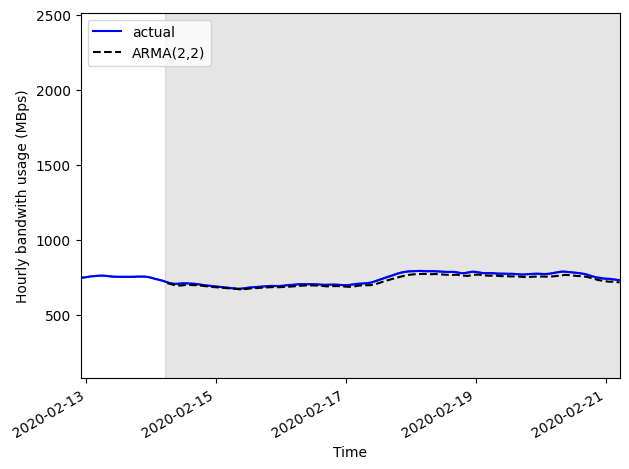

In [29]:
fig, ax = plt.subplots()
ax.plot(df['hourly_bandwidth'])
ax.plot(df['hourly_bandwidth'], 'b-', label='actual')
ax.plot(df['pred_bandwidth'], 'k--', label='ARMA(2,2)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage (MBps)')
ax.axvspan(9831, 10000, color='#808080', alpha=0.2)
ax.set_xlim(9800, 9999)
plt.xticks(
[9802, 9850, 9898, 9946, 9994],
['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])
fig.autofmt_xdate()
plt.tight_layout()

Al observar los resultados en la figura, se puede ver que nuestras previsiones, representadas como una línea discontinua, siguen de cerca los valores reales del conjunto de prueba, y las dos líneas casi coinciden.

Podemos medir el error absoluto medio (MAE) de las predicciones ARMA(2,2) no diferenciadas para entender qué tan alejadas están las predicciones de los valores reales. Usaremos el MAE simplemente porque es fácil de interpretar.

In [30]:
from sklearn.metrics import mean_absolute_error
mae_ARMA_undiff = mean_absolute_error(df['hourly_bandwidth'][9832:],df['pred_bandwidth'][9832:])
print(mae_ARMA_undiff)

14.000362774142175


Esto da como resultado un MAE de 14, lo que significa que, en promedio, nuestras previsiones están 14 Mbps por encima o por debajo del uso real del ancho de banda.

# Proximos pasos

En este capítulo, cubrimos el modelo ARMA(p,q) y cómo combina eficazmente un modelo AR(p) con un modelo MA(q) para modelar y pronosticar series temporales más complejas. Esto nos llevó a definir un procedimiento de modelado completamente nuevo que no depende del estudio cualitativo de los gráficos ACF y PACF. En su lugar, ajustamos muchos modelos ARMA(p,q) con diferentes combinaciones de (p,q) y seleccionamos el modelo con el menor AIC. Luego analizamos los residuales del modelo para asegurarnos de que sus propiedades fueran similares al ruido blanco: distribución normal, estacionario y no correlacionado.
Este análisis es tanto cualitativo, porque podemos estudiar el gráfico Q-Q para evaluar si los residuos están distribuidos normalmente, como cuantitativo, ya que podemos aplicar la prueba de Ljung-Box para determinar si los residuos están correlacionados o no. Si los residuos del modelo tienen las propiedades de una variable aleatoria, como el ruido blanco, el modelo puede ser utilizado para la predicción.

Hasta ahora hemos cubierto diferentes modelos para series temporales estacionarias: principalmente el modelo MA(q), el modelo AR(p) y el modelo ARMA(p,q). Cada modelo requirió que transformáramos nuestros datos para hacerlos estacionarios antes de poder realizar pronósticos. Además, tuvimos que invertir la transformación en nuestras predicciones para obtener resultados en la escala original de los datos.

`Sin embargo, hay una manera de modelar series de tiempo no estacionarias sin tener que transformarlas y revertir la transformación en las predicciones`. Específicamente, podemos modelar series de tiempo integradas utilizando el modelo de promedio móvil integrado autorregresivo o ARIMA(p,d,q). Este será el tema del siguiente capítulo.

# Resumen

- El modelo de medias móviles autorregresivas, denotado como ARMA(p,q), es la combinación del modelo autorregresivo AR(p) y el modelo de medias móviles MA(q).
- Un proceso ARMA(p,q) mostrará un patrón decreciente o un patrón sinusoidal en las gráficas ACF y PACF. Por lo tanto, no se pueden usar para estimar los órdenes p y q.
- El procedimiento general de modelado no se basa en los gráficos ACF y PACF. En su lugar, ajustamos muchos modelos ARMA(p,q) y realizamos selección de modelos y análisis de residuos.
- La selección del modelo se realiza con el criterio de información de Akaike (AIC). Este cuantifica la pérdida de información de un modelo y está relacionado con el número de parámetros en un modelo y su ajuste. Cuanto menor sea el AIC, mejor será el modelo.
- El AIC es una medida relativa de calidad. Devuelve el mejor modelo entre otros modelos. Para una medida absoluta de calidad, realizamos un análisis de residuos.
- Los residuos de un buen modelo deben aproximarse al ruido blanco, lo que significa que deben ser no correlacionados, distribuidos normalmente e independientes.
- El gráfico Q-Q es una herramienta gráfica para comparar dos distribuciones. Lo usamos para comparar la distribución de los residuos con respecto a una distribución normal teórica. Si el gráfico muestra una línea recta que se encuentra en y = x, entonces ambas distribuciones son similares. De lo contrario, significa que los residuos no están distribuidos normalmente.
- La prueba de Ljung-Box nos permite determinar si los residuales están correlacionados o no. La hipótesis nula establece que los datos están distribuidos independientemente y son no correlacionados. Si los valores p devueltos son mayores que 0.05, no podemos rechazar la hipótesis nula, lo que significa que los residuales no están correlacionados, al igual que el ruido blanco.